In [7]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets,layers,models,Model


In [8]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


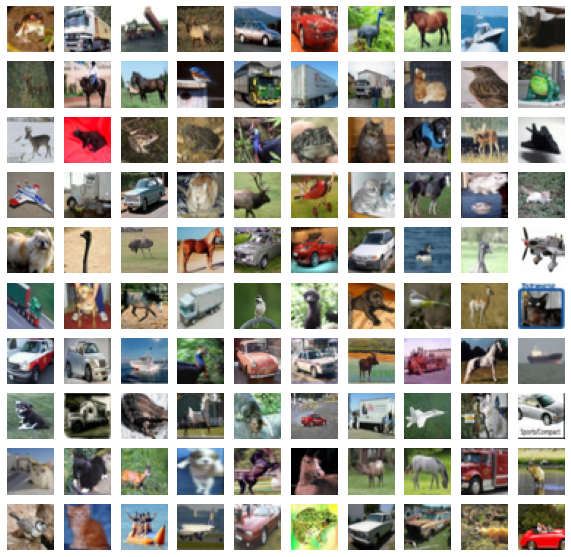

In [10]:
plt.figure(figsize = (10,10))
for i in range(100):
  plt.subplot(10,10,1+i)
  plt.axis('off')
  plt.imshow(X_train[i])

In [11]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_datagen.fit(X_train)

In [14]:

val_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen.fit(X_test)

In [15]:

model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(64, (5,5), activation = 'relu', input_shape = (32,32,3)),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Flatten(),
      
                tf.keras.layers.Dense(512, activation = 'relu'),
                tf.keras.layers.Dense(10, activation = 'softmax')
])

In [16]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer = SGD(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
history = model.fit(
          train_datagen.flow(X_train,y_train, batch_size = 128),
          validation_data = val_datagen.flow(X_test, y_test),
          batch_size = 128,
          epochs = 25,
          verbose = 1
)

Epoch 1/25
391/391 [==============================] - 117s 298ms/step - loss: 2.2530 - accuracy: 0.1690 - val_loss: 2.1244 - val_accuracy: 0.2183
Epoch 2/25
391/391 [==============================] - 117s 298ms/step - loss: 2.0554 - accuracy: 0.2451 - val_loss: 1.9779 - val_accuracy: 0.2851
Epoch 3/25
391/391 [==============================] - 117s 298ms/step - loss: 1.8991 - accuracy: 0.3130 - val_loss: 1.8236 - val_accuracy: 0.3482
Epoch 5/25
391/391 [==============================] - 116s 297ms/step - loss: 1.8274 - accuracy: 0.3426 - val_loss: 1.8831 - val_accuracy: 0.3318
Epoch 6/25
391/391 [==============================] - 117s 298ms/step - loss: 1.7437 - accuracy: 0.3719 - val_loss: 1.6371 - val_accuracy: 0.4185
Epoch 7/25
391/391 [==============================] - 117s 298ms/step - loss: 1.6805 - accuracy: 0.3968 - val_loss: 1.5666 - val_accuracy: 0.4365
Epoch 8/25
391/391 [==============================] - 117s 299ms/step - loss: 1.6296 - accuracy: 0.4140 - val_loss: 1.5749 -

In [18]:
history.history['accuracy']

[0.16901999711990356,
 0.245059996843338,
 0.28119999170303345,
 0.3130199909210205,
 0.34261998534202576,
 0.3718799948692322,
 0.39678001403808594,
 0.4140399992465973,
 0.4311800003051758,
 0.44058001041412354,
 0.4524399936199188,
 0.4637799859046936,
 0.47666001319885254,
 0.483379989862442,
 0.49292001128196716,
 0.5004600286483765,
 0.5069199800491333,
 0.5131999850273132,
 0.5215399861335754,
 0.5283600091934204,
 0.533079981803894,
 0.5404000282287598,
 0.5459799766540527,
 0.5519400238990784,
 0.5557399988174438]

In [19]:
history.history['loss']

[2.253021001815796,
 2.05535888671875,
 1.9717957973480225,
 1.8991416692733765,
 1.8274188041687012,
 1.74365234375,
 1.6805427074432373,
 1.629638910293579,
 1.5893535614013672,
 1.5600697994232178,
 1.5276117324829102,
 1.5007174015045166,
 1.473806619644165,
 1.451576590538025,
 1.4301278591156006,
 1.4064819812774658,
 1.3918499946594238,
 1.3705185651779175,
 1.3515865802764893,
 1.333897352218628,
 1.3172842264175415,
 1.301711916923523,
 1.2852181196212769,
 1.2701878547668457,
 1.259395718574524]

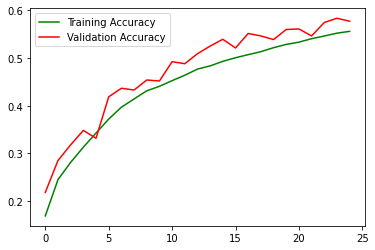

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.legend()

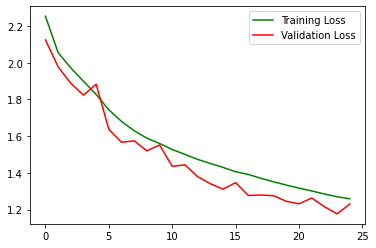

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, color = 'green', label = 'Training Loss')
plt.plot(val_loss, color = 'red', label = 'Validation Loss')
plt.legend()

In [22]:
model.predict(X_train[0:10])

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.9999869e-01, 0.0000000e+00, 1.2853038e-06,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.7077897e-21, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.00